# Day Two

Ce matin : manipulation de fichier et commandes système
Il faut s'assurer qu'un fichier / connexion soit fermé. Pour ça, il existe un gestionnaire de contexte qui simplifie les TRY / EXCEPT : "WITH"
(fichier authors.txt : PF members)

In [22]:
# exemple ouverture fichier en read only
with open("authors.txt","r") as fh:            # fh = file handle. Tête de lecture sur le fichier
    #for line in fh:       # methode 1 : boucle sur chaque ligne
        #print(line+"\n")  # methode 1
        #print(line.split()[0]+"     "+ line.split()[1]+"\n") 
    print(fh.readlines()) # methode 2 : retourne une chaine de caractères
print("Fichier Fermé ? "+str(fh.closed))  # True : le fichier est automatiquement clos à la sortie du bloc with

['Roger Waters\n', 'David Gilmour\n', 'Nick Manson\n', 'Rick Wright']
Fichier Fermé ? True


Pour les chemins Windows : r"c:\bla\bla\bla\" ("r" = raw pour une chaine) ou remplacer "\" par "/", ça fonctionne aussi

In [23]:
import json

In [31]:
with open("/home/hellday/Téléchargements/reporter/data/authors.json","r") as authors_file:
    authors = json.load(authors_file) # json en natif. Chaine -> liste de dictionnaires
    
    

In [32]:
authors


[{'firstname': 'John',
  'lastname': 'Lennon',
  'address': 'Abbey Road',
  'age': 37},
 {'firstname': 'Paul',
  'lastname': 'MacCartney',
  'address': 'Abbey Road',
  'age': 27,
  'email': 'paul@thebeatles.org'},
 {'firstname': 'Georges',
  'lastname': 'Harrison',
  'address': 'Abbey Road',
  'age': 27,
  'email': 'george@thebeatles.org'}]

In [42]:
for member in authors: # parcours des dictionnaires
    print(member["firstname"]+ " - "+member["lastname"])

John - Lennon
Paul - MacCartney
Georges - Harrison


In [43]:
import os
os.path.join("/home","hellday","reporter") # vieille méthode pour composer des cheminss

'/home/hellday/reporter'

In [55]:
from pathlib import Path # module plus sympa
base_path = Path(os.environ["HOME"]) 
base_path/"mon_dir1/mon_dir2" # on peut composer directement si un rep existe
base_path.is_file() # on peut tester existence


False

1) ouvrir fichier authors.json et appeler fonction create_header
argument : nom de fichier 

Conseil : "il faut soigner les interfaces car tout se passe par là". 
"_ma_fonction" : le "_" signifie "privée", normalement par desinée aux utilisateurs (A.K.A "tambouille interne"

module "warnings" : fonction warn() qui permet de remonter des messages. 
A voir : module logging, shutil 
Packager : python wheel ? 
Note : la ligne "def ma_fonction(mes_args)" = la "signature" de la fonction.


In [108]:
import os
import sys
import json
import datetime
from pathlib import Path


def create_header(authors_list, loc="Paris"):
    """Creates the header text.
    
    Parameters
    ----------
    authors_list: a list of dict
        each dictionnary should contain "firstname" and "lastname" keys
    loc : str, optional, default "Paris"
        The localistaion from where the report is emitted
    
    Returns
    -------
    header_text : str
        The header text
    
    """
    
    today = datetime.date.today()
    date_string = today.strftime(f'{loc}, le %d/%m/%Y')
    author_strings = [date_string, "### Authors", "\n"]
    
    
    for author in authors_list:
        firstname = author.get("firstname", "")
        lastname = author.get("lastname", "")
        if not lastname:
            print('No value for lastname')
        author_string = f'- {firstname} {lastname}'

        author_strings.append(author_string)
    return "\n".join(author_strings)

def header_from_json_file(path_to_json_file,loc="Paris"):
    """ Génère l'en-tête avec les informations d'auteurs depuis le fichier
    donné en paramètre """
    try:
        with open(path_to_json_file,"r") as authors_file:
            authors = json.load(authors_file)
            return create_header(authors,loc)
    except FileNotFoundError:
        print("### {} : not found".format(path_to_json_file))
        return ""

In [104]:
print(header_from_json_file("/home/hellday/Téléchargements/reporter/data/authors.json","loc=Londres"))

loc=Londres, le 18/10/2019
### Authors


- John Lennon
- Paul MacCartney
- Georges Harrison


Pour passer les arguments de fonction en fonction : 
    def ma_fonction (arg1, arg2 , **kwargs)
    
"**kwargs" = dictionnaire de key words argument


Pas évident à utiliser. Faut être prudent.("c'est compliqué à utliser et c'est casse gueule", sic)

Debug
---------

Conseil : lors du dev, utiliser iPython si possible
Debugger Python : pdb 
%pdb : active /désactive le debugger (iPython)
Commandes de base : "p" : print, "h" : help, "pdef" : print funct def, "u" : up dans la liste d'execution et "d" pour down. "c" : continue.  

In [119]:
%pdb

Automatic pdb calling has been turned ON


In [120]:
def boum(arg1,arg2):
    """ Fonction qui explose quand on mélange 2 types"""
    print(arg1 + arg2)

In [121]:
boum


<function __main__.boum(arg1, arg2)>

In [122]:
boum(1,"a")

TypeError: unsupported operand type(s) for +: 'int' and 'str'

> <ipython-input-120-5bf976a942d2>(2)boum()
      1 def boum(arg1,arg2):
----> 2     print(arg1 + arg2)

ipdb> h

Documented commands (type help <topic>):
EOF    cl         disable  interact  next    psource  rv         unt   
a      clear      display  j         p       q        s          until 
alias  commands   down     jump      pdef    quit     source     up    
args   condition  enable   l         pdoc    r        step       w     
b      cont       exit     list      pfile   restart  tbreak     whatis
break  continue   h        ll        pinfo   return   u          where 
bt     d          help     longlist  pinfo2  retval   unalias  
c      debug      ignore   n         pp      run      undisplay

Miscellaneous help topics:
exec  pdb

ipdb> p boum
<function boum at 0x7fdc01634710>
ipdb> pdef boum
 boum(arg1, arg2)
 ipdb> u
> <ipython-input-122-8afc3627b120>(1)<module>()
----> 1 boum(1,"a")

ipdb> q


Programmation objet
------------------------------
mot clé : class

self : désigne l'objet lui-même. Conteneur permettant accès aux attributs et aux méthodes. 

Conseil : si on crée une fonction, essayer de lui donner un nom de verbe.

On peut ajouter des nouveaux attributs à une instance d'objet. 

Le nom d'une classe prend une majuscule au début puis CamelCase.

"Pet" est une "Classe abstraite". 

In [55]:
class Pet:
    """ Classe gérant des animaux"""
    def __init__(self,name,age,weight,size):
        """ self = reference à l'objet lui-même """
        self.name = name
        self.age = age
        self.weight = weight
        self.size = size
        #self.bmi = self.weight / self.size**2 # calculé à l'initionalisation de la nouvelle instance 
                                              # de l'objet PET. Ne change pas si le poid change (static)
    
    @property                 # décorateur. Calcul un attribut dynamique pour la méthode directement dessus
    def bmi(self):            # Body Mass Indice : weight / size au carré
        """ calcule l'indice de masse corporelle """
        return self.weight/self.size**2 
        
    def walk(self,distance):
        """ ajuste le poids en fonction de l'exercice """
        self.weight = self.weight - 0.1 * distance
        
    def eat(self,qtt):
        """ Ajuste le poids en fonction de l'alimentation 
        La quantité (qtt) doit être strictement positive"""
        if qtt > 0:
           self.weight = self.weight + qtt 
           print(f"{self.name} pèse maintenant {self.weight}") 
        else:
            print("La quantité doit être strictement positive")
            raise ValueError
        

In [56]:
medor = Pet("Médor",2,7,0.71) # instance de Pet

In [59]:
medor.eat(30)   # médor mange pour se remettre de l'exercice

Médor pèse maintenant 67


In [60]:
medor.weight

67

In [28]:
medor.bmi

25.3069320474676

In [61]:
bytes.fromhex('70').decode('utf-8')

'p'

Maintenant on veut ajouter le cri de l'animal. Problème : il change selon le type d'animal. Il faut donc ajouter
une classe héritant des caratéristiques de Pet mais propre aux chats et aux chiens (c'est un exemple)

In [75]:
class Pet:
    """ Classe gérant des animaux"""
    def __init__(self,name,age,weight,size):
        """ self = reference à l'objet lui-même """
        self.name = name
        self.age = age
        self.weight = weight
        self.size = size
        #self.bmi = self.weight / self.size**2 # calculé à l'initionalisation de la nouvelle instance 
                                              # de l'objet PET. Ne change pas si le poid change (static)
    
    @property                 # décorateur. Calcul un attribut dynamique pour la méthode directement dessus
    def bmi(self):            # Body Mass Indice : weight / size au carré
        """ calcule l'indice de masse corporelle """
        return self.weight/self.size**2 
        
    def walk(self,distance):
        """ ajuste le poids en fonction de l'exercice """
        self.weight = self.weight - 0.1 * distance
        
    def eat(self,qtt):
        """ Ajuste le poids en fonction de l'alimentation 
        La quantité (qtt) doit être strictement positive"""
        if qtt > 0:
           self.weight = self.weight + qtt 
           print(f"{self.name} pèse maintenant {self.weight}") 
        else:
            print("La quantité doit être strictement positive")
            raise ValueError
    def speak(self):
        """ Placeholder pour les méthodes de Cat and Dog 
        'speak n'est pas implémentée directement dans Pet mais on réserve 
        son espace pour fixer le nom, par convention. 
        Traditionnellement, on indique juste 'raise NotImplemented'"""       
        raise NotImplemented
            
class Dog(Pet):
    """ Classe héritant de Pet avec la parole pour les chiens """
    def speak(self):
        print("whoa whoa\n (Il lui manque que la parole)")
    
class Cat(Pet):
    """ Classe héritant de Pet avec la parole pour les chats """
    def speak(self):    
        print("Miow miow\n (Il lui manque que la parole")


In [76]:
medor = Dog("Médor",1,2,2)
felix = Cat("Félix",1,2,3)

In [77]:
felix.speak()

Miow miow
 (Il lui manque que la parole


In [74]:
medor.speak()

whoa whoa
 (Il lui manque que la parole)


On peut surcharger les méthodes spéciales (__XXX__) de la classe : __add__ (on redéfinit le comportement de l'addition de deux instances de la classe), __str__ (affichage de l'objet, ie : print)


In [81]:
class Pet:
    """ Classe gérant des animaux"""
    def __init__(self,name,age,weight,size):
        """ self = reference à l'objet lui-même """
        self.name = name
        self.age = age
        self.weight = weight
        self.size = size
        #self.bmi = self.weight / self.size**2 # calculé à l'initionalisation de la nouvelle instance 
                                              # de l'objet PET. Ne change pas si le poid change (static)
    
    @property                 # décorateur. Calcul un attribut dynamique pour la méthode directement dessus
    def bmi(self):            # Body Mass Indice : weight / size au carré
        """ calcule l'indice de masse corporelle """
        return self.weight/self.size**2 
        
    def walk(self,distance):
        """ ajuste le poids en fonction de l'exercice """
        self.weight = self.weight - 0.1 * distance
        
    def eat(self,qtt):
        """ Ajuste le poids en fonction de l'alimentation 
        La quantité (qtt) doit être strictement positive"""
        if qtt > 0:
           self.weight = self.weight + qtt 
           print(f"{self.name} pèse maintenant {self.weight}") 
        else:
            print("La quantité doit être strictement positive")
            raise ValueError
            
    def speak(self):
        """ Placeholder pour les méthodes de Cat and Dog 
        'speak n'est pas implémentée directement dans Pet mais on réserve 
        son espace pour fixer le nom, par convention. 
        Traditionnellement, on indique juste 'raise NotImplemented'"""       
        raise NotImplemented
    
    def __str__(self):
        """ on surcharge __str__ pour formater l'information lors d'un print """
        return f"hello my name is {self.name}"
            
class Dog(Pet):
    """ Classe héritant de Pet avec la parole pour les chiens """
    def speak(self):
        print("whoa whoa\n (Il lui manque que la parole)")
    
class Cat(Pet):
    """ Classe héritant de Pet avec la parole pour les chats """
    def speak(self):    
        print("Miow miow\n (Il lui manque que la parole")


In [79]:
medor = Dog("Médor",1,2,2)
felix = Cat("Félix",1,2,3)

In [80]:
print(medor)

hello my name is Médor


In [84]:
(0x3D)

int

In [86]:
int("0x3D",16)

61

In [ ]:
import os
import sys
import json
import datetime
from pathlib import Path


def create_header(authors_list, loc="Paris"):
    """Creates the header text.
    
    Parameters
    ----------
    authors_list: a list of dict
        each dictionnary should contain "firstname" and "lastname" keys
    loc : str, optional, default "Paris"
        The localistaion from where the report is emitted
    
    Returns
    -------
    header_text : str
        The header text
    
    """
    
    today = datetime.date.today()
    date_string = today.strftime(f'{loc}, le %d/%m/%Y')
    author_strings = [date_string, "### Authors", "\n"]
    
    
    for author in authors_list:
        firstname = author.get("firstname", "")
        lastname = author.get("lastname", "")
        if not lastname:
            print('No value for lastname')
        author_string = f'- {firstname} {lastname}'

        author_strings.append(author_string)
    return "\n".join(author_strings)

def header_from_json_file(path_to_json_file,loc="Paris"):
    """ Génère l'en-tête avec les informations d'auteurs depuis le fichier
    donné en paramètre """
    try:
        with open(path_to_json_file,"r") as authors_file:
            authors = json.load(authors_file)
            return create_header(authors,loc)
    except FileNotFoundError:
        print("### {} : not found".format(path_to_json_file))
        return ""

Exemple de connexion sur une base de données
---------------------------------------------
... exemple avec SQLlite mais quand même . 


Exo : On veut un histogramme des chansons de la durée par genre 


In [119]:
import sqlite3       # si plus complexe : SQLAlchemy
import pandas as pd  # pour visualiser facilement 
import matplotlib as mpt

In [154]:
with sqlite3.connect('./chinook.db') as conn:
    tracks = pd.read_sql('select g.Name,avg(t.Milliseconds) as moy_mil from Tracks t, Genres g where g.GenreId = t.GenreId  group by t.GenreId ', conn)
    

In [158]:
tracks.set_index('moy_mil')

,Name
moy_mil,
2.839100e+05,Rock
2.917554e+05,Jazz
3.097494e+05,Metal
2.343538e+05,Alternative & Punk
1.346435e+05,Rock And Roll
2.703598e+05,Blues
2.328593e+05,Latin
2.471778e+05,Reggae
2.290341e+05,Pop


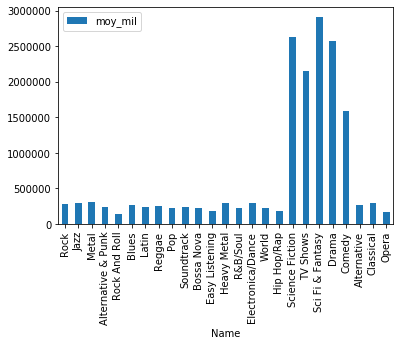

In [160]:
histo = tracks.plot.bar(x='Name', y='moy_mil')

Pour des graphes plus jolis : seaborn 

Appel des commandes système : subprocess
-----------------------------------------------------------------
Il prend en entrée un tableau des mots de la commande à exécuter

Ex : subprocess.run(["ps","auxwww","grep","grep"])

Il existe os.system : mais plus vieux et moins bien. 

In [168]:
import subprocess
ps = subprocess.run(["ps","auxwww"])